# The Sequence Space Jacobian (SSJ) method

- [Krusell and Smith (1997)](https://www.journals.uchicago.edu/doi/abs/10.1086/250034) solved their HA macro model with a "state space" method
  - They approximate the model solution for every conceivable combination of states
  - This is very expensive computationally

- The [sequence space Jacobian method (SSJ)](https://www.econometricsociety.org/publications/econometrica/2021/09/01/using-sequence-space-jacobian-solve-and-estimate-heterogeneous) (Auclert et al., 2021) is an alternative
  - It computes a solution to the model for an expected path of shocks
  - This allows computation of the solution for only the interesting shocks

- The SSJ method solves for solutions to 'MIT shocks'
    - The key requirement is that the MIT shocks be small, _relative_ to the distribution of microeconomic state variables
    - This permits -- in fact, requires -- rich micro heterogeneity
    - SSJ is usable when there is an aggregate equilibrium and micro heterogeneity
        - So long as the "aggregate shocks" are _relatively_ small
        - So it can be used to study industry or market equilibrium

- The algorithm assumes that agents have perfect foresight wrt aggregates
    - The model is deterministic wrt the evolution of aggregate "shocks"

- As a result, easily calculable Jacobian matrices are a "sufficient statistic"
  -  They provide information sufficient to compute the macro dynamics
  - Even when the microfoundations have rich complexity and realism


## Advantages of SSJ

- Can solve equilibrium models with rich microeconomic heterogeneity
    - Basic HANK models can take 3 seconds, previous methods take at least 15 minutes

- Can add additional exogenous aggregate shocks at virtually no cost.

## Krusell Smith Model in Sequence Space

Here we solve a slightly simplified version of the Krusell-Smith model to clarify the exposition. In particular, we assume each household inelastically supplies $\ell$ units of labor.


### Households

Assume a continuum of atomistic households on the unit interval $[0,1]$ indexed by $i$. 

Assume households have perfect foresight over the real interest rate $r_{t}$ and the real wage $w_{t}$.



#### Household's Problem

Households seek to maximize their expected discounted sum of lifetime utility of consumption. Variables that are idiosyncratic to a household have an $i$ subscript, while aggregate variables do not.

$$
V_{t}(m_{it}) = \max_{c_{it}} u(c_{it}) + E_{t}\left[ V_{t+1}(m_{it+1}) \right] \text{ s.t.}
$$

$$ m_{it} = y_{it} + (1+\mathit{r}_{t})k_{it-1},$$

$$ c_{it} + k_{it}= m_{it},$$ 

$$k_{it} \geq 0,$$

where $m_{it}$ is market resources (`cash on hand`), $k_{it}$ is capital holdings and $y_{it}$ is labor income.


#### Labor Income

Labor income is the product of an idiosyncratic transitory shock $\theta$, the wage rate $w$ (determined in aggregate), and the exogenously fixed individual labor supply $\ell$:

$$y_{t} = \theta_{it} w_{t} \ell,$$

$$log(\theta_{it}) \sim N\left(-\frac{\sigma_{\theta}^2}{2}, \sigma_{\theta}^2 \right).$$

## Firms and Production

Output is produced by firms via a Cobb-Douglas production function over aggregate capital $K_t$ and labor $L_t$, scaled by total factor productivity $Z_t$:

$$Y_{t} = Z_{t}K_{t}^{\alpha}L_{t}^{1-\alpha}.$$

### Determination of Wage and Interest Rates

Assume perfectly competitive markets, so that the factor prices are given by their marginal product:

$$
w_{t} = (1-\alpha) Z_{t} K_{t}^{\alpha}L_{t}^{-\alpha},
$$

$$
r_{t} = \alpha  Z_{t} K_{t}^{\alpha - 1} L_{t}^{1-\alpha}.
$$

### Dynamics of Productivity

TFP $Z_t$ follows an AR(1) process in logs, with correlation factor $\rho_Z$ and standard deviation of shocks $\sigma_Z$.

$$log(Z_{t}) = \rho_{Z} \log( Z_{t-1}) + \epsilon_{t},$$

$$\epsilon_t \sim N(0, \sigma_Z^2).$$

## Market Clearing 

Aggregate capital and labor are found by aggregating idiosyncratic values over the population. For labor, this is trivial, as each household exogenously supplies $\ell$ units of labor. To denote the switch to aggregate labor, apply a new label:

$$L_{t} = \int_0^1 \ell di = \ell \equiv \bar{L}.$$

Each household's choice of capital holdings $k_{it}$ depends on the entire future sequence of factor prices they will face. Denote that sequence as $\left\{r_{s},w_{s}\right\}_{s=0}^{T}$, and the *savings function* in period $t$ as $\mathsf{k}_t(m_{it}, \cdot)$, which depends on current market resources and future prices. Then define aggregate capital as:

$$K_{t} = \int_{0}^{1} k_{it} di = \int_{0}^{1} \mathsf{k}_{t}(m_{it}, \left\{r_{s},w_{s}\right\}_{s=0}^{T}) di \equiv \mathcal{K}_{t}\left(\left\{r_{s},w_{s}\right\}_{s=0}^{T} \right).$$

Notice that aggregate capital $K_t$ depends on the entire distribution of idiosyncratic market resources $m_{it}$.

# Model as defined by diff eqns in sequence space


The sequence-space equilibrium can be expressed as a root of a system of difference equations on the sequence of current and future prices and productivity shocks. For notational convenience, the sequence of aggregate outcomes will be represented by $\textbf{U}$, and the sequence of productivity shocks by $\textbf{Z}$. For period $t$, the equilibrium conditions are:

$$ H_{t}(\mathbf{U},\mathbf{Z}) = \begin{pmatrix} 
 \mathcal{K}_{t}(\{r_{s} ,w_{s} \}_{s=t}^{s=T}) - K_{t}  \\ \\
  w_{t} - (1-\alpha) Z_{t} K_{t}^{\alpha} \bar{L}^{-\alpha} \\ \\
r_{t} - \alpha  Z_{t} K_{t}^{\alpha - 1} \bar{L}^{1-\alpha} \\ \\
 \end{pmatrix} = \begin{pmatrix} 0 \\ 0  \\ 0\\ \end{pmatrix} , \quad t=0,1,2,3,...$$
 
 where 
 
 $\mathbf{U} = \left\{K_{t}, r_{t}, w_{t} \right\}_{t=0}^{s=T},$
 
 $\mathbf{Z} = \left\{Z_{t}\right\}_{t=0}^{t=T}.$

The equilibrium conditions for a single period can be stacked across all periods $t=0,\cdots,T$, yielding the overall system:

$$\mathbf{H}(\mathbf{U},\mathbf{Z})= \begin{pmatrix} 
H_{0}(\mathbf{U},\mathbf{Z}) \\ \\
\vdots \\ \\
 H_{t}(\mathbf{U},\mathbf{Z}) \\ \\
\vdots \\ \\
H_{T}(\mathbf{U},\mathbf{Z}) \\ \\
 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ \vdots \\ 0 \\ 0 \\ 0 \\ \vdots \\ 0 \\ 0 \\ 0 \\ \end{pmatrix}.$$

## Solve the model by linearizing around the steady state

We are interested in how aggregate outcomes will change in response to exogenous shocks. Denote the endogenous impulse response as $d\mathbf{U} \equiv \left\{dK_{t} , dr_{t} , dw_{t} \right\}_{t=0}^{t=T}$, and the exogenous shock (a change in future productivity shocks) as $d\mathbf{Z} = \left\{ dZ_{t}\right\}_{t=0}^{t=T}$.

The characterization of the equilibrium conditions as a root of a system of equations $\mathbf{H}(\mathbf{U},\mathbf{Z}) = 0$ defined on the *sequence space* allows us to apply the implicit function theorem to finf the impulse response:

$$ d\mathbf{U} = -\mathbf{H}_{\mathbf{U}}(\mathbf{U}_{ss},\mathbf{Z}_{ss})^{-1} \mathbf{H}_{\mathbf{Z}}(\mathbf{U}_{ss},\mathbf{Z}_{ss}) d\mathbf{Z}.$$

We thus have a characterization of how aggregate outcomes respond to exogenous shocks *near the steady state outcomes*. In this context, the ``steady state productivity shock sequence'' $\mathbf{Z}_{ss}$ is simply $(0,\cdots,0)$, and the steady state outcome sequence is a constant sequence of aggregate capital and factor prices that obtain *in the absence of macroeconomic shocks*.

## Heterogenous Agent Jacobian 

When computing $-\mathbf{H}_{\mathbf{U}}(\mathbf{U}_{ss},\mathbf{Z}_{ss})^{-1}$ we will need to compute the Jacobian of

$$\mathbf{F}(\mathbf{r},\mathbf{w}) =  \begin{pmatrix} \mathcal{K}_{0}(\{r_{s}, w_{s} \}_{s=0}^{s=T})\\
\vdots \\
\mathcal{K}_{t}(\{r_{s} ,w_{s} \}_{s=0}^{s=T})\\
\vdots \\
\mathcal{K}_{T}(\{r_{s} ,w_{s} \}_{s=0}^{s=T})\\
\end{pmatrix}.$$ 


More specifically, we will need the Jacobian matrices $\mathbf{F}_{\mathbf{r}}(\mathbf{r},\mathbf{w})$ and $\mathbf{F}_{\mathbf{w}}(\mathbf{r},\mathbf{w})$, where
  
  $$ \mathbf{F}_{\mathbf{r}}(\mathbf{r},\mathbf{w}) = \begin{pmatrix} 
\frac{ \partial \mathcal{K}_{0}}{\partial r_{0}}  & ... & \frac{ \partial \mathcal{K}_{0}}{ \partial r_{t}} & ... & \frac{ \partial  \mathcal{K}_{0}}{\partial r_{T}} \\ . \\ .
\\ 
.
\\
\frac{ \partial \mathcal{K}_{t}}{\partial r_{0}}  & ... & \frac{ \partial \mathcal{K}_{t}}{ \partial r_{t}} & ... & \frac{ \partial \mathcal{K}_{t}}{\partial r_{T}} \\ . \\ .
\\ . \\
\frac{ \partial \mathcal{K}_{T}}{\partial r_{0}}  & ...  & \frac{ \partial \mathcal{K}_{T}}{ \partial r_{t}} & ... & \frac{ \partial  \mathcal{K}_{T}}{\partial r_{T}}  \\ \\
 \end{pmatrix}$$

(and likewise for $\mathbf{F}_{\mathbf{w}}(\mathbf{r},\mathbf{w})$).

These Jacobian matrices are the most computationally complex object to compute in the model. On a 2024 laptop used to produce the results here, such methods can take up to 20 minutes for each matrix.

But the sequence space Jacobian methodology uses a 'fake news' algorithm to solve these matrices in under 3 seconds!

## Overall algorithm


1. Define model in sequence space

$$\mathbf{H}(\mathbf{U},\mathbf{Z}) = \mathbf{0}$$

2. Solve for steady state

$$\mathbf{H}(\mathbf{U}_{ss},\mathbf{Z}_{ss}) = \mathbf{0}$$

where $\mathbf{U}_{ss} = \left(U_{ss}, .. U_{ss}, .., U_{ss} \right)$ 

3. Linearize around steady state and solve for impulse responses $d\mathbf{U}$ given exogenous shock $d\mathbf{Z}$

$$ d\mathbf{U} = -\mathbf{H}_{\mathbf{U}}^{-1} \mathbf{H}_{\mathbf{Z}} d\mathbf{Z}$$

When linearizing, find heterogenous agent Jacobians with fake news algorithm


## What if the model contains many equations?

Here, because labor is exogenously supplied, aggregate capital $K_t$ is a sufficient statistic for factor prices $r_t$ and $w_t$. The system above can thus be reduced to simply:

$$ H_{t}(\mathbf{U},\mathbf{Z}) \equiv \begin{pmatrix} 
 \mathcal{K}_{t}\left(\{\alpha  Z_{t} K_{t}^{\alpha - 1} \bar{L}^{1-\alpha} ,(1-\alpha) Z_{s} K_{s}^{\alpha} \bar{L}^{-\alpha} \}_{s=0}^{s=T}\right) - K_{t}  \\
 \end{pmatrix} = 0, \quad t=0,1 ,2,3,....$$
 
 where  $\mathbf{U} = \left(K_{0},K_{1}.K_{2}....,K_{T}  \right)$.

When the model contains many equations, we can represent the model as a directed acyclic graph to determine how the model should be reduced. 

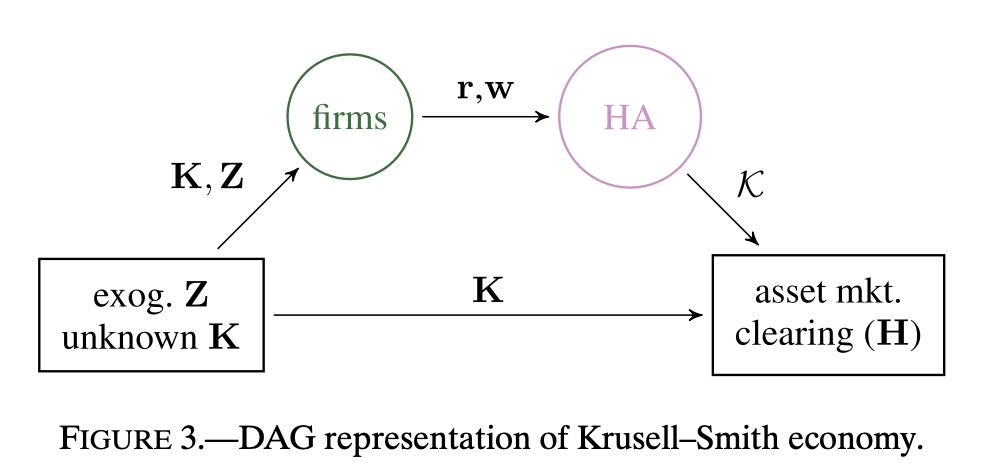

In [1]:
from IPython import display

display.Image("KS_DAG.jpeg")

## Solving Using the HANK-SSJ Link

A companion notebook, `KS-HARK-presentation` presents the solution to the model described above using the HARK toolkit in combination with the SSJ toolkit.